In [1]:
import numpy as np

In [2]:
covs = np.load("/home/gemeinl/data/covs/mean_train_covs.npy")

In [3]:
y = np.load("/home/gemeinl/data/covs/train_pathology_labels_without_822.npy")

In [4]:
covs.shape, len(y)

((2716, 21, 21), 2716)

In [5]:
from pyriemann.tangentspace import TangentSpace

In [6]:
ts = TangentSpace()
covs = ts.fit_transform(covs)

In [7]:
covs = np.array([cov.ravel() for cov in covs])

In [8]:
covs.shape, len(y)

((2716, 231), 2716)

covs = covs - np.min(covs, axis=1, keepdims=True)
covs = scaled_covs / np.max(scaled_covs, axis=1, keepdims=True)

In [9]:
import sys

In [10]:
sys.path.insert(1, "/home/gemeinl/code/brainfeatures/")

In [11]:
from brainfeatures.data_set.tuh_abnormal import TuhAbnormal

In [12]:
ds = TuhAbnormal("/home/gemeinl/data/feats_100_Hz/median/train/", key="natural", extension=".h5")

In [13]:
ds.load()

In [14]:
feature_matrices = [x for x, fs, y in ds]

In [15]:
def plot_feature_correlations(data, title='', xticks=None, xticklabels=None,
                              yticks=None, yticklabels=None, offset=1, fs=20, va="top", ha="right"):
    fig, ax = plt.subplots(1, 1, figsize=(12,12))
    ax.set_title(title, fontsize=fs)
    
    im = ax.imshow(
        data,
        cmap="RdBu_r",
        interpolation=None,
        vmin=-1,
        vmax=1,
        aspect="equal"
    )

    ax.tick_params(
        axis=u'both',
        which=u'major',
        length=5,
        direction=u"inout",
        size=fs,
        bottom=True,
        left=True,
    )

    if yticks is not None and yticklabels is not None:
        yticklabels = np.array(yticklabels)
        yticks = np.array(yticks)
        ax.set_yticks(
            yticks
        )
        ax.set_yticklabels(
            yticklabels,
            va=va,
            size=fs
        )
    else:
        ax.set_yticks([])
    if xticks is not None and xticklabels is not None:
        xticklabels = np.array(xticklabels)
        xticks = np.array(xticks)
        ax.set_xticks(
            xticks,
        )
        ax.set_xticklabels(
            xticklabels,
            rotation=90,
            ha=ha,
            size=fs
        )
    else:
        ax.set_xticks([])

    cb = fig.colorbar(
        im,
        fraction=0.046,
        pad=0.04
    )
    cb.ax.tick_params(labelsize=15)
    cb.ax.set_ylabel("Correlation coefficient", size=fs)
    
    ax.grid(False)
    return fig, ax

In [16]:
domains = [label.split("_")[0] for label in feature_matrices[0].columns]
if "meta" in domains:
    domains.remove("meta")
counts = [domains.count(domain) for domain in np.unique(domains)]
ticks_at = np.cumsum([0] + counts)
ticks_at2 = np.cumsum(counts)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [22]:
len(feature_matrices)

2716

In [23]:
covs.shape

(2716, 231)

In [24]:
feature_matrices[0].shape

(1, 8631)

In [25]:
feature_labels = feature_matrices[0].columns

In [26]:
ticks_at

array([   0, 1344, 2184, 5019, 8169, 8631])

In [27]:
ticks_at = [   0, 1344, 2184, 5019, 5019+231, 8169+231, 8631+231]

In [28]:
ticks_at2

array([1344, 2184, 5019, 8169, 8631])

In [29]:
ticks_at2 = [1344, 2184, 5019, 5019+231, 8169+231, 8631+231]

In [30]:
fm_with_riemann = []
for i in range(len(feature_matrices)):
    tmp = np.concatenate((feature_matrices[i][:5019].values.ravel(), covs[i], feature_matrices[i][5019:].values.ravel()))
    fm_with_riemann.append(tmp)

In [31]:
from scipy.stats import spearmanr

In [32]:
feature_corr_riem_matrix, p_values = spearmanr(fm_with_riemann)

In [33]:
feature_corr_riem_matrix.shape

(8862, 8862)

In [37]:
c = ""
yticklabels = [
    "CWT_bounded-variation_a7_{}A1".format(41*c, 10*c, 4*c),
    "DWT_bounded-variation_a7_{}A1".format(41*c, 10*c, 4*c),
    "FT_maximum_0.0-2.0Hz_A1".format(39*c, 21*c, 4*c),
    "Riemannian_covariance-matrix_A1",
    "Connectivity_plv_0.0-2.0Hz_A1-A2".format(34*c, 27*c, 10*c),
    "Time_detrended-fluctuation-analysis_A1".format(54*c, 4*c),
]
xticklabels = [
    "CWT_variance_d0_T6".format(26*c, 10*c, 4*c),
    "DWT_variance_d0_T6".format(26*c, 10*c, 4*c),
    "FT_variance_30.0-49.9Hz_T6".format(41*c, 25*c, 4*c),
    "Riemannian_covariance-matrix_T6",
    "Connectivity_plv_30.0-49.9Hz_T5-T6".format(37*c, 30*c, 10*c),
    "Time_zero-crossings-derivative_T6".format(46*c, 4*c),
]

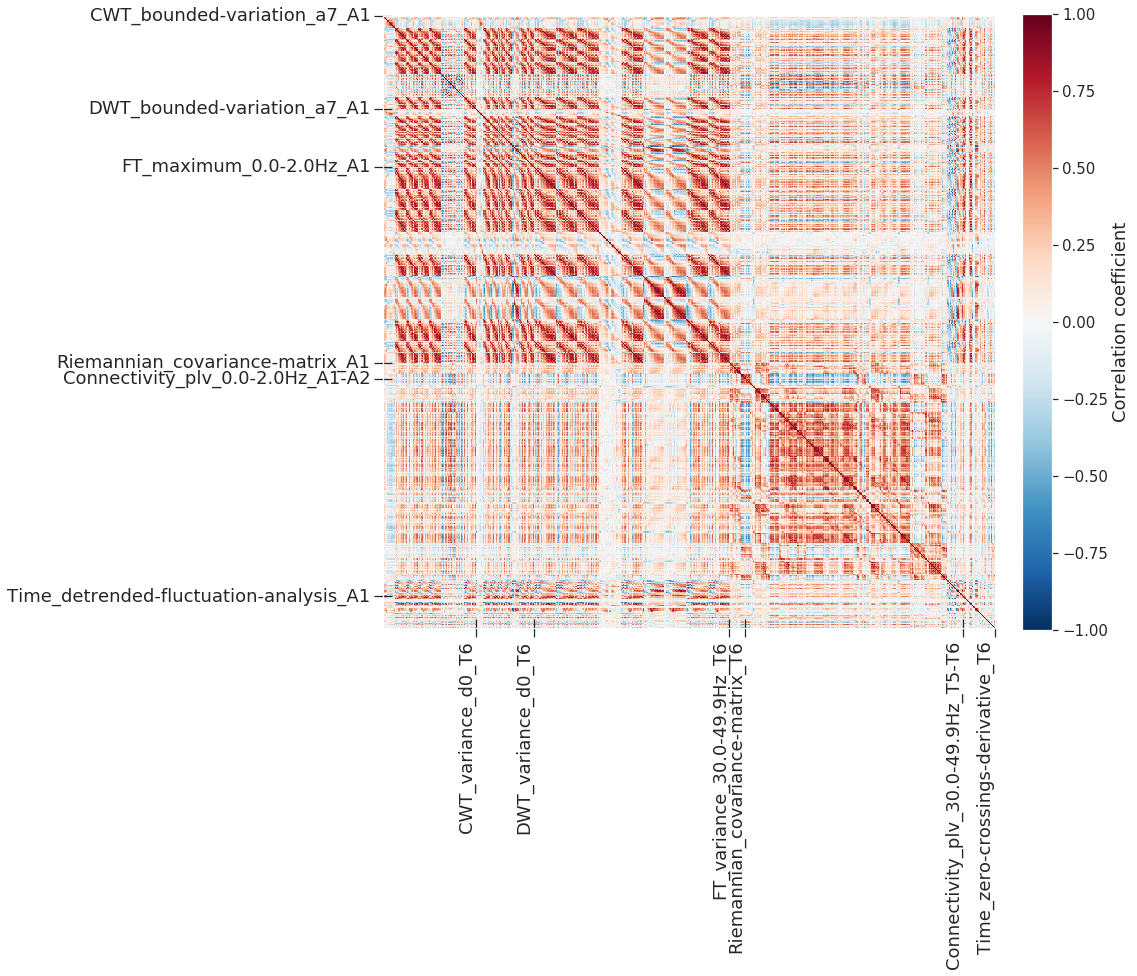

In [38]:
fig, ax = plot_feature_correlations(feature_corr_riem_matrix,
                                    yticks=ticks_at[:-1],
                                    xticklabels=xticklabels,
                                    xticks=ticks_at2,
                                    yticklabels=yticklabels,
                                    fs=18, va="center")